## Imporing neccesary libraries

In [52]:
# !pip install nltk
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 35.7 MB/s eta 0:00:00


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#NLP text preocessing
import nltk
import gensim
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

## Model Training
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

## EDA And Feature Engineering

In [39]:
import json
import pandas as pd

train_df=pd.read_csv('/content/sample_data/Kindle_user_review/train.txt', sep='\t', header=None )
df=train_df
test_df=pd.read_csv('/content/sample_data/Kindle_user_review/test.txt', sep='\t', header=None )

In [40]:
print(train_df.shape)
print(test_df.shape)

(60498, 1)
(9312, 1)


In [41]:
# Extract the label and create a new column
train_df['Ratings'] = train_df[0].apply(lambda x: int(x.split(' ')[0].replace('__label__', '')))
test_df['Ratings'] = test_df[0].apply(lambda x: int(x.split(' ')[0].replace('__label__', '')))

# Remove the label from the original column and rename it to 'review'
train_df['review'] = train_df[0].apply(lambda x: ' '.join(x.split(' ')[1:]))
train_df = df.drop(columns=[0])
test_df['review'] = test_df[0].apply(lambda x: ' '.join(x.split(' ')[1:]))
test_df = test_df.drop(columns=[0])

# Display the updated DataFrame
display(train_df.head())
display(test_df.head())

,Ratings,review
0,2,Great CD: My lovely Pat has one of the GREAT v...
1,2,One of the best game music soundtracks - for a...
2,1,Batteries died within a year ...: I bought thi...
3,2,"works fine, but Maha Energy is better: Check o..."
4,2,Great for the non-audiophile: Reviewed quite a...


,Ratings,review
0,2,Stuning even for the non-gamer: This sound tra...
1,2,The best soundtrack ever to anything.: I'm rea...
2,2,Amazing!: This soundtrack is my favorite music...
3,2,Excellent Soundtrack: I truly like this soundt...
4,2,"Remember, Pull Your Jaw Off The Floor After He..."


In [42]:
train_df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60498 entries, 0 to 60497
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ratings  60498 non-null  int64 
 1   review   60498 non-null  object
dtypes: int64(1), object(1)
memory usage: 945.4+ KB


(60498, 3)

In [43]:
train_df.isnull().sum()

,0
Ratings,0
review,0


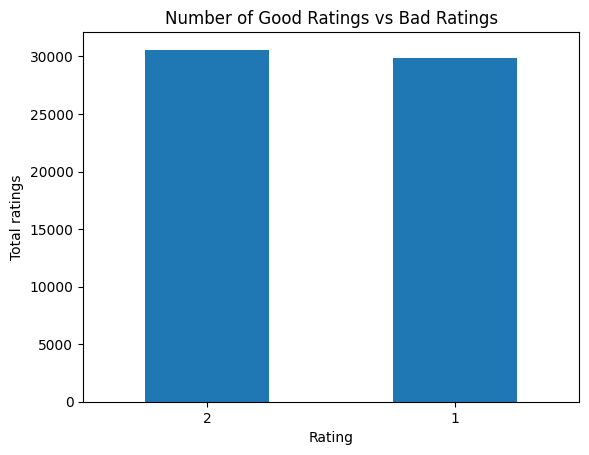

In [44]:
train_df['Ratings'].value_counts().plot(kind = 'bar')
plt.title('Number of Good Ratings vs Bad Ratings')
plt.xlabel('Rating')
plt.xticks(rotation = 0)
plt.ylabel('Total ratings')
plt.show()

## Text Preprocessing

### Preprocessing for Training Data

In [48]:
print("Original Word: ", train_df['review'][1])
print('\n')

#Remove Puncuation
pun=str.maketrans('', '', string.punctuation)
train_df['review'] = train_df['review'].apply(lambda x: ' '.join(word.translate(pun) for word in x.split()))
print("After Removing Puncuation: ", train_df['review'][1])
print('\n')

# Alphapetical Value
train_df['review']=train_df['review'].apply(lambda x: ' '.join(word for word in x.split() if word.isalpha()))
print("Alphapetical Value: ", train_df['review'][1])
print('\n')

# Lower Case the words
train_df['review']=train_df['review'].apply(lambda x: x.lower())
print("Lower Case the words: ", train_df['review'][1])
print('\n')

# Removing Stopwords
eng_stop = stopwords.words('english')
train_df['review']=train_df['review'].apply(lambda x: ' '.join(word for word in x.split() if word not in eng_stop))
print('After Removed Stopords: ', train_df['review'][1])
print('\n')

#Lemmatization
lem=WordNetLemmatizer()
train_df['review']=train_df['review'].apply(lambda x: ' '.join(lem.lemmatize(word) for word in x.split()))
print('Lemmatization: ', train_df['review'][1])
print('\n')



Original Word:  One of the best game music soundtracks - for a game I didn't really play: Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too many of those kinds of songs in my other video game soundtracks. I must admit that one of the songs (Life-A Distant Promise) has brought tears to my eyes on many occasions.My one complaint about this soundtrack is that they use guitar fretting effects in many of the songs, which I find distracting. But even if those weren't included I would still consider the collection worth it.


After Removing Puncuation:  One of the best game music soundtracks  for a game I didnt really play Despite the fact that I have only played a small portion of the ga

### preprocessing for Test Data

In [49]:
print("Original Word: ", test_df['review'][1])
print('\n')

#Remove Puncuation
pun=str.maketrans('', '', string.punctuation)
test_df['review'] = test_df['review'].apply(lambda x: ' '.join(word.translate(pun) for word in x.split()))
print("After Removing Puncuation: ", test_df['review'][1])
print('\n')

# Alphapetical Value
test_df['review']=test_df['review'].apply(lambda x: ' '.join(word for word in x.split() if word.isalpha()))
print("Alphapetical Value: ", test_df['review'][1])
print('\n')

# Lower Case the words
test_df['review']=test_df['review'].apply(lambda x: x.lower())
print("Lower Case the words: ", test_df['review'][1])
print('\n')

# Removing Stopwords
eng_stop = stopwords.words('english')
test_df['review']=test_df['review'].apply(lambda x: ' '.join(word for word in x.split() if word not in eng_stop))
print('After Removed Stopords: ', test_df['review'][1])
print('\n')

#Lemmatization
lem=WordNetLemmatizer()
test_df['review']=test_df['review'].apply(lambda x: ' '.join(lem.lemmatize(word) for word in x.split()))
print('Lemmatization: ', test_df['review'][1])
print('\n')

Original Word:  The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.


After Removing Puncuation:  The best soundtrack ever to anything Im reading a lot of reviews saying that this is the best game soundtrack and I figured that Id write a review to disagree a bit This in my opinino is Yasunori Mitsudas ultimate masterpiece The music is timeless and Im been listening to it for years now and its beauty simply refuses to fadeThe price tag on this is pretty staggering I must say but if you are going to buy any cd for this much money this is 

### Preprocessing
#### CountVectorize

In [50]:
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(train_df['review'])
X_test_counts = count_vectorizer.transform(test_df['review'])


 #### TFIDF

In [51]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['review'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['review'])


#### Word2Vec

In [60]:
def get_avg_word2vec_vector(text, model, vector_size):
    words = word_tokenize(text)
    vectors = [model.wv[word] for word in words if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        # Return a zero vector if no words from the review are in the model's vocabulary
        return np.zeros(vector_size)

word2vec_model_train = Word2Vec(sentences=[word_tokenize(review) for review in train_df['review']], vector_size=100, window=5, min_count=1)
word2vec_model_test = Word2Vec(sentences=[word_tokenize(review) for review in test_df['review']], vector_size=100, window=5, min_count=1)

x_train_word2vec = np.array([get_avg_word2vec_vector(review, word2vec_model_train, 100) for review in train_df['review']])
x_test_word2vec = np.array([get_avg_word2vec_vector(review, word2vec_model_test, 100) for review in test_df['review']])

## Model Trainig

In [68]:
def train_model(models, X_train, y_train, X_test, y_test):
    for model_name, model in models.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      print(f"{model_name} Accuracy: {accuracy}")
      print('\n')
      print('--------------------------------------------')
      print(classification_report(y_test, y_pred))
      print('--------------------------------------------')
      print('\n')
    return


In [74]:
y_train=train_df['Ratings']
y_test=test_df['Ratings']
models={
    'MultinomialNB':MultinomialNB(),
    'LogisticRegression':LogisticRegression(),
    'RandomForestClassifier':RandomForestClassifier(),
    'SVC':SVC()
}

#### Output for BOW

In [75]:
print("Model Trained using CountVectorizer")
train_model(models, X_train_counts, y_train, X_test_counts, y_test)

Model Trained using CountVectorizer
MultinomialNB Accuracy: 0.8472938144329897


--------------------------------------------
              precision    recall  f1-score   support

           1       0.84      0.87      0.85      4775
           2       0.86      0.82      0.84      4537

    accuracy                           0.85      9312
   macro avg       0.85      0.85      0.85      9312
weighted avg       0.85      0.85      0.85      9312

--------------------------------------------


LogisticRegression Accuracy: 0.8685567010309279


--------------------------------------------
              precision    recall  f1-score   support

           1       0.87      0.87      0.87      4775
           2       0.86      0.87      0.87      4537

    accuracy                           0.87      9312
   macro avg       0.87      0.87      0.87      9312
weighted avg       0.87      0.87      0.87      9312

--------------------------------------------




#### Output for TFIDF

In [77]:
print("Model Trained using TFIDF")
print("\n")
train_model(models, X_train_tfidf, y_train, X_test_tfidf, y_test)

Model Trained using TFIDF


MultinomialNB Accuracy: 0.8481529209621993


--------------------------------------------
              precision    recall  f1-score   support

           1       0.84      0.87      0.85      4775
           2       0.86      0.83      0.84      4537

    accuracy                           0.85      9312
   macro avg       0.85      0.85      0.85      9312
weighted avg       0.85      0.85      0.85      9312

--------------------------------------------


LogisticRegression Accuracy: 0.8776847079037801


--------------------------------------------
              precision    recall  f1-score   support

           1       0.88      0.88      0.88      4775
           2       0.87      0.87      0.87      4537

    accuracy                           0.88      9312
   macro avg       0.88      0.88      0.88      9312
weighted avg       0.88      0.88      0.88      9312

--------------------------------------------




#### Using Word2Vec

In [ ]:
print("Model Trained using Word2Vec")
print("\n")

# Create a new models dictionary excluding MultinomialNB for Word2Vec
word2vec_models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC()
}

train_model(word2vec_models, x_train_word2vec, y_train, x_test_word2vec, y_test)

Model Trained using Word2Vec


LogisticRegression Accuracy: 0.5093427835051546


--------------------------------------------
              precision    recall  f1-score   support

           1       0.51      0.97      0.67      4775
           2       0.43      0.02      0.04      4537

    accuracy                           0.51      9312
   macro avg       0.47      0.50      0.36      9312
weighted avg       0.47      0.51      0.37      9312

--------------------------------------------


